# Boundary layer depth

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%%capture 
# comment above line to see details about the run(s) displayed
from misc import *
from mom6_tools.m6plot import myStats, annotateStats
import cartopy.crs as ccrs
import cartopy.feature
import intake
%matplotlib inline

## Monthly

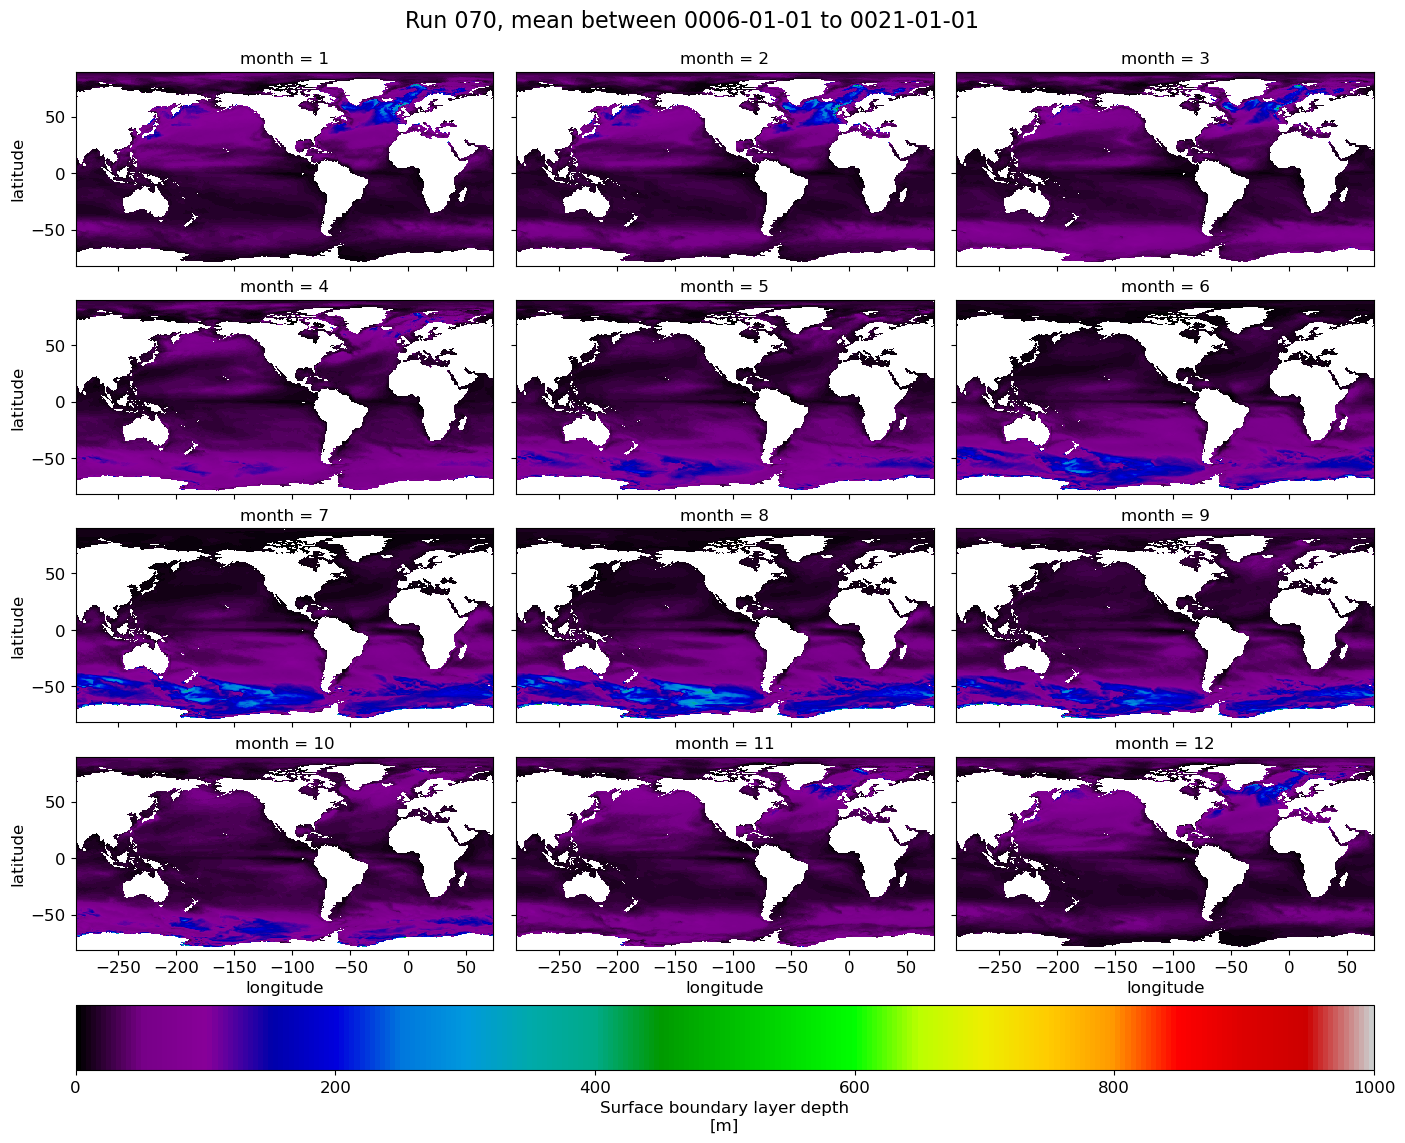

In [3]:
for path, case, i in zip(ocn_path, casename, range(len(casename))):
  ds =  xr.open_dataset(path+case+'_BLD_monthly_clima.nc')
  g = ds.oml.plot(x="longitude", y="latitude", col='month', 
                col_wrap=3,
                robust=True,
                figsize=(14,12),
                cmap='nipy_spectral',
                vmin=0., vmax=1000.,
                cbar_kwargs={"orientation": "horizontal", "pad": 0.05},
               )
  # Add a suptitle
  g.fig.suptitle('Run {}, mean between {} to {}'.format(label[i], start_date, end_date), fontsize=16, y=1.02);

## Winter

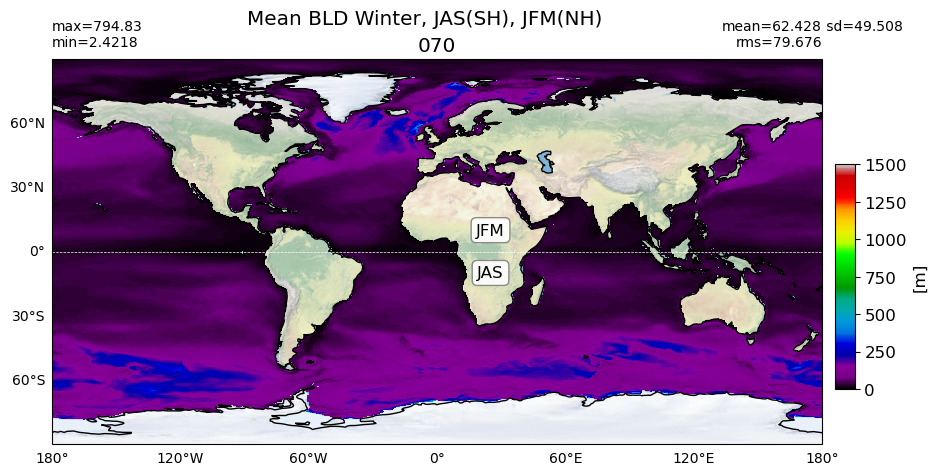

In [4]:
for path, case, i in zip(ocn_path, casename, range(len(casename))):
  ds =  xr.open_dataset(path+case+'_BLD_winter.nc')
  winter = np.ma.masked_invalid(ds.BLD_winter.values)

  try:
    area= grd[i].area_t
  except:
    area= grd[i].areacello
      
  # winter
  plot_map(winter, area, grd[i], label[i], 
           vmin=0, vmax=1500, suptitle="Mean BLD Winter, JAS(SH), JFM(NH)",
           cmap='nipy_spectral')

## Summer

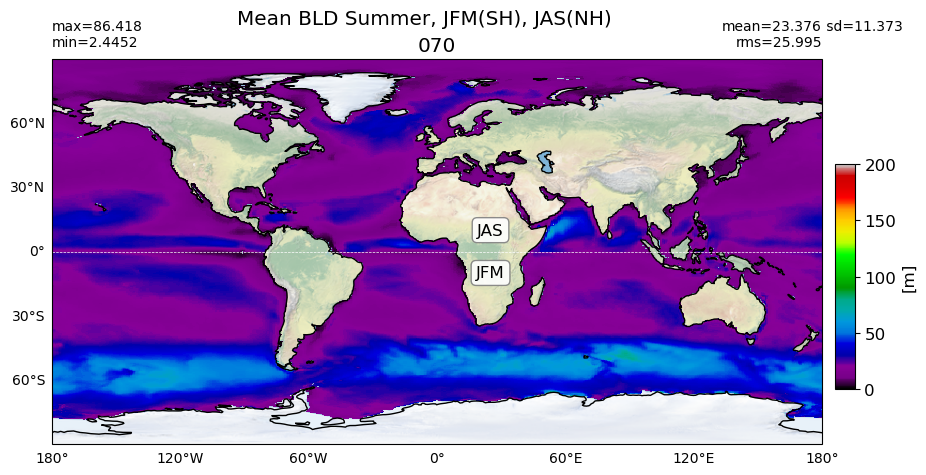

In [5]:
for path, case, i in zip(ocn_path, casename, range(len(casename))):
  ds =  xr.open_dataset(path+case+'_BLD_summer.nc')
  summer = np.ma.masked_invalid(ds.BLD_summer.values)

  try:
    area= grd[i].area_t
  except:
    area= grd[i].areacello
      
  # summer
  plot_map(summer, area, grd[i], label[i], 
           vmin=0, vmax=200, suptitle="Mean BLD Summer, JFM(SH), JAS(NH)", 
           nh='JAS', sh='JFM', cmap='nipy_spectral') 